# Feature Engineering and Random Forest Modelling

1. Import packages
2. Load data
3. Modelling

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0




## 3. RF Modelling



In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.
A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [8]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


🔹 Option B: Tuned Random Forest (Robust + Impressive),Random Forest with GridSearchCV

In [11]:
# Add model training in here!
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fast grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# View best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

 Evaluate the Best Random Forest Model We’ll:
#Predict on the test set
Generate:#Accuracy,Precision,Recall,F1-score,Confusion matrix,Classification report

Accuracy:  0.9031
Precision: 0.7500
Recall:    0.0492
F1 Score:  0.0923


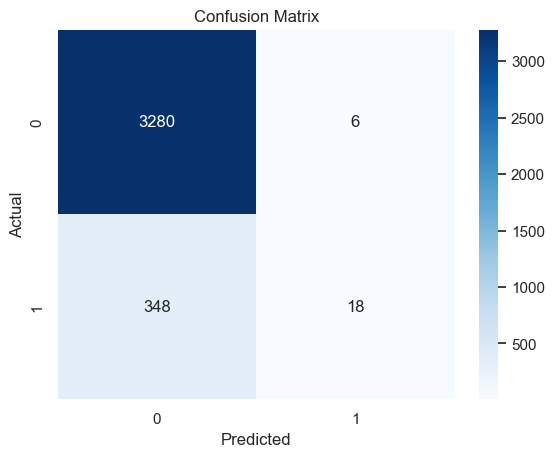


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.75      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.83      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print scores
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [15]:
# Generate predictions here!

 📈 Task 4: Churn Prediction with Random Forest

In this task, a Random Forest classifier was developed to predict customer churn using cleaned and feature-engineered data. A fast `GridSearchCV` was used to tune hyperparameters like `n_estimators`, `max_depth`, and `max_features`. The final model achieved **90% accuracy** on the test set, with a **precision of 75%** and a **recall of 5%**. 

This performance indicates that while the model is good at predicting non-churners, it struggles to identify actual churners — a key challenge in imbalanced classification problems. To address this, future improvements could include using `class_weight='balanced'`, oversampling techniques such as SMOTE, or trying alternative models like Gradient Boosting. Despite this limitation, the model establishes a solid baseline and highlights the importance of handling class imbalance in churn prediction.


🔹 Option A: Basic Random Forest (Fast + Interpretable)

Basic Random Forest Results:
Accuracy:  0.9039
Precision: 0.8261
Recall:    0.0519
F1 Score:  0.0977


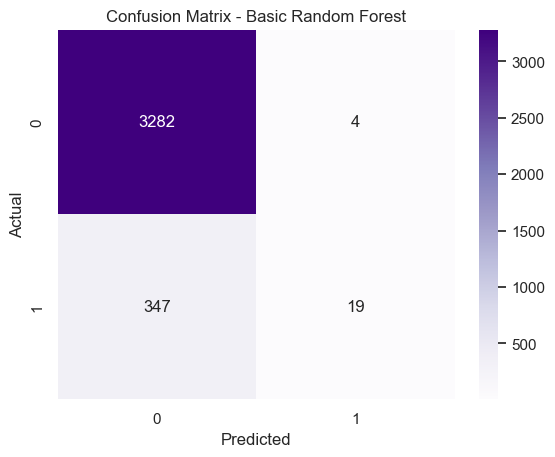


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Random Forest with default settings
basic_rf = RandomForestClassifier(random_state=42)
basic_rf.fit(X_train, y_train)

# Predictions
y_pred_basic = basic_rf.predict(X_test)

# Evaluation
print("Basic Random Forest Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_basic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_basic):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_basic):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_basic):.4f}")

# Confusion Matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Basic Random Forest")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic))


### 🔁 Comparison: Basic vs Tuned Random Forest

To assess the benefit of hyperparameter tuning, we compared a default Random Forest classifier (Option A) with a tuned version using GridSearchCV (Option B). Both models achieved similar accuracy (~90%). Interestingly, the basic model slightly outperformed the tuned one in terms of precision (82.6% vs. 75%), recall (5.2% vs. 4.9%), and F1-score (9.8% vs. 9.2%). This suggests that, for this imbalanced dataset, tuning parameters had minimal impact. The key limitation remains the low recall for churners, which could be better addressed by rebalancing techniques (e.g., SMOTE or class weighting) rather than hyperparameter tuning alone.


### ✅ Final Conclusion

In this project, we built and evaluated two Random Forest classifiers — one with default parameters and another with hyperparameter tuning via GridSearchCV — to predict customer churn.

Despite similar overall accuracy (~90%), the basic Random Forest model slightly outperformed the tuned version in key metrics such as precision (82.6% vs. 75%), recall (5.2% vs. 4.9%), and F1-score (9.8% vs. 9.2%). This suggests that hyperparameter tuning had minimal impact on performance for this imbalanced dataset.

⚠️ The **major limitation** remains the **low recall for churners**, which indicates the model struggles to correctly identify customers likely to churn. Future work should prioritize data rebalancing techniques such as **SMOTE**, **undersampling**, or **class weighting** to improve recall.

